In [120]:
import sys

sys.path.append('../')

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [122]:
from tests.uniform import Unif
from tests.normal import Norm

In [123]:
from src.CharFuncInverter.CharFuncInverter import CharFuncInverter

Характеристическая функция имеет следующий вид:
$$\phi_X(t) = \mathbb{E} e^{itX} = \int\limits_{\mathbb{R}}e^{itx}f_X(x)dx.$$

То есть характеристическая функция -- это преобразование Фурье плотности распределения случайной величины.

Таким образом, при помощи обратного преобразования Фурье мы можем получить функцию плотности:
$$f_X(x) = \frac{1}{2\pi}\int\limits_{\mathbb{R}}e^{-itx}\phi_X(t)dt.$$


Зная функцию плотности, можно получить функцию распределения:
$$
\begin{align*}
F_X(x) &= \mathbb{P}(X < x) =  \int\limits_{-\infty}^{x}f_X(u)du
= \frac{1}{2\pi}\int\limits_{-\infty}^{x}   \int\limits_{-\infty}^{\infty}e^{-itu}\phi_X(t)dt   du =\\
&=\frac{1}{2} - \frac{1}{2\pi}\int\limits_{\mathbb{R}}\frac{e^{-itx}\phi_X(t)}{it}dt
\end{align*}
$$

In [135]:
class FTInverterNaive(CharFuncInverter):

    def __init__(self, N=1e3, delta=1e-1, num_points = None):
        super().__init__()
        self.N = int(N)
        self.delta = delta
        if num_points is None:
            self.num_points = int(N // delta)
        else:
            self.num_points = num_points

    def fit(self, phi):
        """phi = characteristic function"""
        self.phi = phi

    def cdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)
        
        phi_t = self.phi(t)


        integral = np.trapezoid((phi_t * np.exp(-1j * t * x[:, np.newaxis]))/(1j*t), t, axis=1)
        return 1/2 - (1 / (2 * np.pi)) * integral

    def pdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)

        phi_t = self.phi(t)

        integral = np.trapezoid(phi_t * np.exp(-1j * t * x[:, np.newaxis]), t, axis=1)

        return (1 / (2 * np.pi)) * integral

In [136]:
inv = FTInverterNaive(num_points=10000)

# Нормальное распределение

In [137]:
normal = Norm(0, 1)
inv.fit(normal.chr)

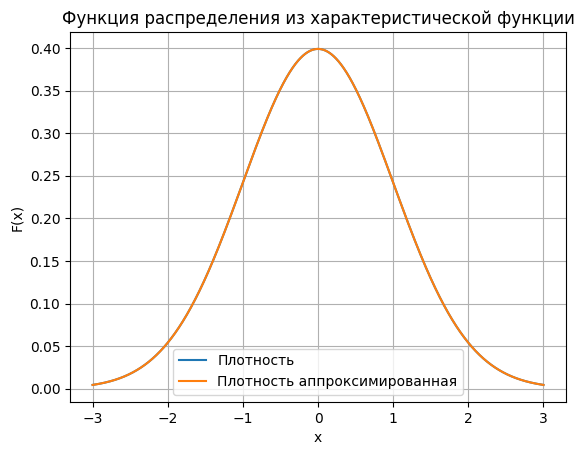

In [138]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = normal.pdf(x)
plt.plot(x, df_true, label='Плотность')
plt.plot(x, distribution_values, label='Плотность аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()


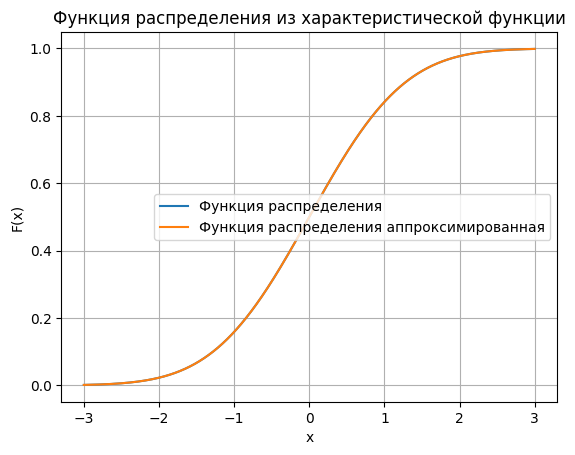

In [139]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.cdf(x)
df_true = normal.cdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

Если брать N = 1e8 то там что-то всё как-то неприятно получается...

# Равномерное распределение

In [140]:
inv = FTInverterNaive(N=10, num_points=10000)
uniform = Unif(-1, 0)
inv.fit(uniform.chr)

### на [0,1]

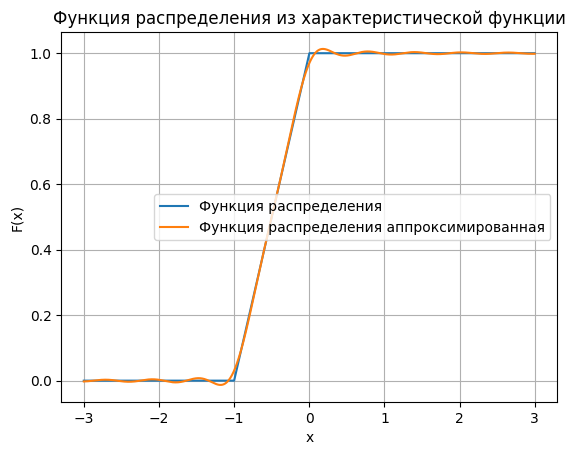

In [141]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.cdf(x)
df_true = uniform.cdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

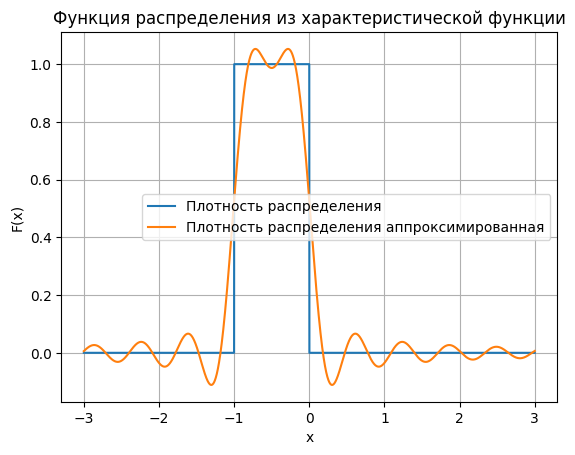

In [142]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = uniform.pdf(x)
plt.plot(x, df_true, label='Плотность распределения')
plt.plot(x, distribution_values, label='Плотность распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

### на [-1, 1]

In [143]:
uniform = Unif(-1, 1)
inv.fit(uniform.chr)

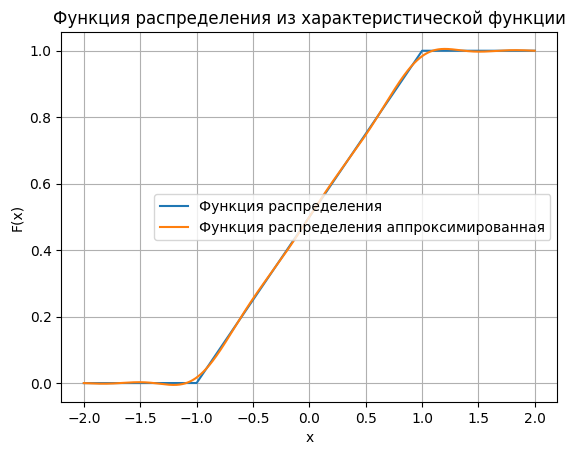

In [144]:
x = np.linspace(-2, 2, 10000)
distribution_values = inv.cdf(x)
df_true = uniform.cdf(x)
plt.plot(x, df_true, label='Функция распределения')
plt.plot(x, distribution_values, label='Функция распределения аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

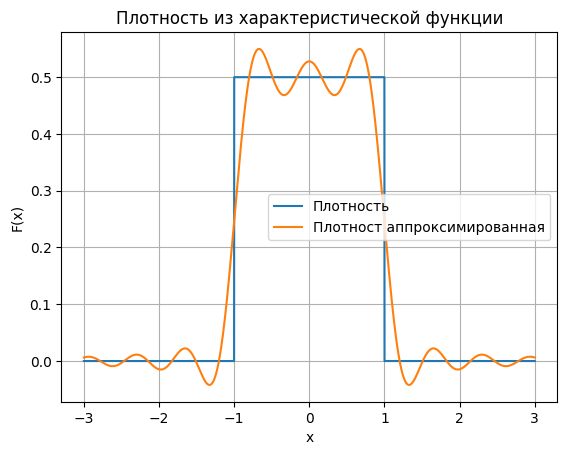

In [145]:
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = uniform.pdf(x)
plt.plot(x, df_true, label='Плотность')
plt.plot(x, distribution_values, label='Плотност аппроксимированная')
plt.title('Плотность из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

# EXPERIMENT 


ValueError: x and y must have same first dimension, but have shapes (10000,) and (9999,)

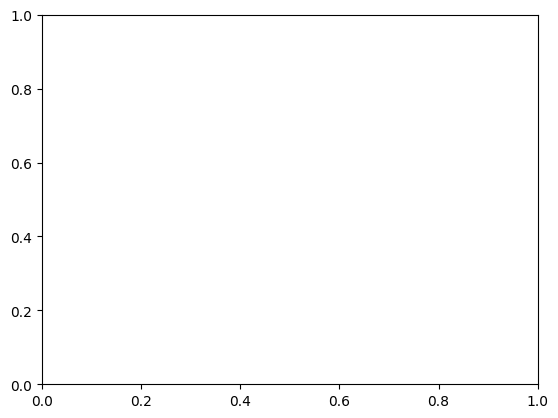

In [186]:
import numpy as np

class FFTInverter(CharFuncInverter):

    def __init__(self, N=1e3, delta=1e-1, num_points=None):
        super().__init__()
        self.N = int(N)
        self.delta = delta
        if num_points is None:
            self.num_points = int(N // delta)
        else:
            self.num_points = num_points

    def fit(self, phi):
        """phi = characteristic function"""
        self.phi = phi

    def cdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)
        phi_t = self.phi(t)

        # Используем IFFT для вычисления интеграла
        integral = np.fft.ifft(phi_t * np.exp(-1j * t[:, np.newaxis] * x)).real

        return 1/2 - (1 / (2 * np.pi)) * integral

    def pdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)
        phi_t = self.phi(t)

        # Используем IFFT для вычисления интеграла
        integral = np.fft.ifft(phi_t).real
        return (1 / (2 * np.pi)) * integral

inv = FFTInverter()
normal = Norm(0, 1)
inv.fit(normal.chr)
x = np.linspace(-3, 3, 10000)
distribution_values = inv.pdf(x)
df_true = normal.pdf(x)
#plt.plot(x, df_true, label='Плотность')
plt.plot(x, distribution_values, label='Плотность аппроксимированная')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()


In [177]:
import numpy as np

phi = lambda t:(np.sin((b - a) * t / 2) / ((b - a) * t / 2)) * np.exp(-1j * (a + b) * t / 2)

p = (np.sqrt(41) - 5) / 8
a = (2*p) / (1-p)
phi = lambda x : (x + 2) + (1-p)*(1-np.exp(-x/a))

N = 1024
d = 0.02
x = np.linspace(-10.16, 2, N)
f = np.fft.fft(phi(x)) / N
f

array([-6.89276124e+08+0.00000000e+00j, -6.58007616e+08+1.42386148e+08j,
       -5.79369541e+08+2.50236243e+08j, ...,
       -4.83563493e+08-3.12240616e+08j, -5.79369541e+08-2.50236243e+08j,
       -6.58007616e+08-1.42386148e+08j], shape=(1024,))

In [179]:
res = []
K = N//2+1
for a in x:
    res.append((sum(f[N // 2: K]) + 0.5*f[min(K, len(f)-1)]).real)
    K = K+1
res

[np.float64(-14444296.148689806),
 np.float64(-24073829.619743526),
 np.float64(-33703368.085319534),
 np.float64(-43332914.04314892),
 np.float64(-52962469.99152693),
 np.float64(-62592038.42950103),
 np.float64(-72221621.8570592),
 np.float64(-81851222.77531847),
 np.float64(-91480843.6867134),
 np.float64(-101110487.09518501),
 np.float64(-110740155.50636981),
 np.float64(-120369851.42778914),
 np.float64(-129999577.3690388),
 np.float64(-139629335.84197912),
 np.float64(-149259129.3609252),
 np.float64(-158888960.44283757),
 np.float64(-168518831.60751367),
 np.float64(-178148745.3777791),
 np.float64(-187778704.2796799),
 np.float64(-197408710.84267524),
 np.float64(-207038767.59983036),
 np.float64(-216668877.08801055),
 np.float64(-226299041.84807533),
 np.float64(-235929264.42507368),
 np.float64(-245559547.36843947),
 np.float64(-255189893.23218802),
 np.float64(-264820304.57511318),
 np.float64(-274450783.96098524),
 np.float64(-284081333.95874965),
 np.float64(-293711957.142

In [178]:
res

[np.float64(-1195873272.66785),
 np.float64(-2003203884.1658645),
 np.float64(-2829872789.23923),
 np.float64(-3687253179.1476693),
 np.float64(-4588522393.720013),
 np.float64(-5548426384.082232),
 np.float64(-6581299090.774504),
 np.float64(-7695758824.857962),
 np.float64(-8885713436.781353),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374),
 np.float64(-10109391701.042374)]

[np.float64(-79.63178711814822),
 np.float64(-132.71965839508277),
 np.float64(-185.80755403886684),
 np.float64(-238.8954862353298),
 np.float64(-291.98346717318697),
 np.float64(-345.0715090450023),
 np.float64(-398.1596240481519),
 np.float64(-451.2478243857882),
 np.float64(-504.33612226780485),
 np.float64(-557.4245299118033),
 np.float64(-610.5130595440603),
 np.float64(-663.6017234004971),
 np.float64(-716.6905337276496),
 np.float64(-769.7795027836418),
 np.float64(-822.8686428391588),
 np.float64(-875.9579661784246),
 np.float64(-929.04748510018),
 np.float64(-982.1372119186645),
 np.float64(-1035.2271589645998),
 np.float64(-1088.3173385861764),
 np.float64(-1141.4077631500438),
 np.float64(-1194.4984450423017),
 np.float64(-1247.5893966694973),
 np.float64(-1300.6806304596248),
 np.float64(-1353.7721588631284),
 np.float64(-1406.8639943539079),
 np.float64(-1459.9561494303314),
 np.float64(-1513.0486366162488),
 np.float64(-1566.1414684620124),
 np.float64(-1619.234657545500